In [65]:
# Import all the required libraries 


import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

In [66]:
# Load dataset. 

filepath = "data/stud.csv"

data_import = pd.read_csv(filepath) 
data_import.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [67]:
data_import.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [68]:
# Understand the dataset ! 

data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [69]:
# Check for duplicated values , if any remove them. 

no_of_duplicated_rows = data_import.duplicated().sum()
print(f"No of duplicated rows: {no_of_duplicated_rows}")

data_import = data_import.drop_duplicates()
print(f"Are duplicated values removed? , No of duplicated rows: {data_import.duplicated().sum()}") 


No of duplicated rows: 1
Are duplicated values removed? , No of duplicated rows: 0


In [70]:
# Check datatypes. 

data_import.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [71]:
# Check for no of unque values.


data_import.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [72]:
# Check statistics of dataset. 

data_import.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


##### Observation 


<i>
    1. From above description of numerical data , all means are very close to each other - between 66 and 68.9,<br>
    2. All standard deviation are also close - betweeen 14.7 and 15.57 , <br>
    3. While minimum score for maths is 13,for writing 23 and for reading it's much higher 27. <br> 
</i>

In [73]:
# Exploring data. 


print("categories in 'gender' varaible: " ,end = "")
print(data_import['gender'].unique())

print("categories in 'race/ethnicity' varaible: " ,end = "")
print(data_import['race/ethnicity'].unique())

print("categories in 'parental level of education' varaible: " ,end = "")
print(data_import['parental level of education'].unique())

print("categories in 'lunch' varaible: " ,end = "")
print(data_import['lunch'].unique())

print("categories in 'test preparation course' varaible: " ,end = "")
print(data_import['test preparation course'].unique())

categories in 'gender' varaible: ['male' 'female']
categories in 'race/ethnicity' varaible: ['group A' 'group D' 'group E' 'group B' 'group C']
categories in 'parental level of education' varaible: ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
categories in 'lunch' varaible: ['standard' 'free/reduced']
categories in 'test preparation course' varaible: ['completed' 'none']


In [74]:
# define numerical and categorical columns.


numerical_cols = [feature for feature in data_import.columns if data_import[feature].dtype != 'O']
categorical_cols = [feature for feature in data_import.columns if data_import[feature].dtype == 'O']


print(f"Numerical cols : {numerical_cols}\n Categorical cols: {categorical_cols}" )

Numerical cols : ['math score', 'reading score', 'writing score']
 Categorical cols: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [75]:
data_import.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [76]:
# adding more columnms such as average and total_score. 

data_import['total_score'] = data_import['math score'] + data_import['reading score'] + data_import['writing score']

data_import['average'] = data_import['total_score']/3  


data_import.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group A,high school,standard,completed,67,67,63,197,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,169,56.333333
3,male,group B,high school,standard,none,77,78,68,223,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,219,73.000000


In [77]:
# No of student's who got full marks.  

reading_full = data_import[data_import['reading score'] == 100]['average'].count()
writing_full = data_import[data_import['writing score'] == 100]['average'].count()
math_full = data_import[data_import['math score']== 100]['average'].count()

print(f"No of student with full marks in \nMaths:{math_full},\nWriting:{writing_full}\nReading:{reading_full}.")


No of student with full marks in 
Maths:13,
Writing:17
Reading:18.


In [78]:
# No of student's who got less marks than 20. {Subject wise}

math_lessthan_20 = data_import[data_import['math score'] < 30]['average'].count()
writing_lessthan_20 = data_import[data_import['writing score'] < 30]['average'].count()
reading_lessthan_20 = data_import[data_import['reading score'] < 30]['average'].count()

print(f"No of student with less than 20 marks in \nMaths:{math_lessthan_20},\nWriting:{writing_lessthan_20}\nReading:{reading_lessthan_20}.")


No of student with less than 20 marks in 
Maths:9,
Writing:8
Reading:5.


##### Observation
<i>
    1. Students have performed the best in Reading. <br>
    2. Whereas they lack in maths. <br>
</i>

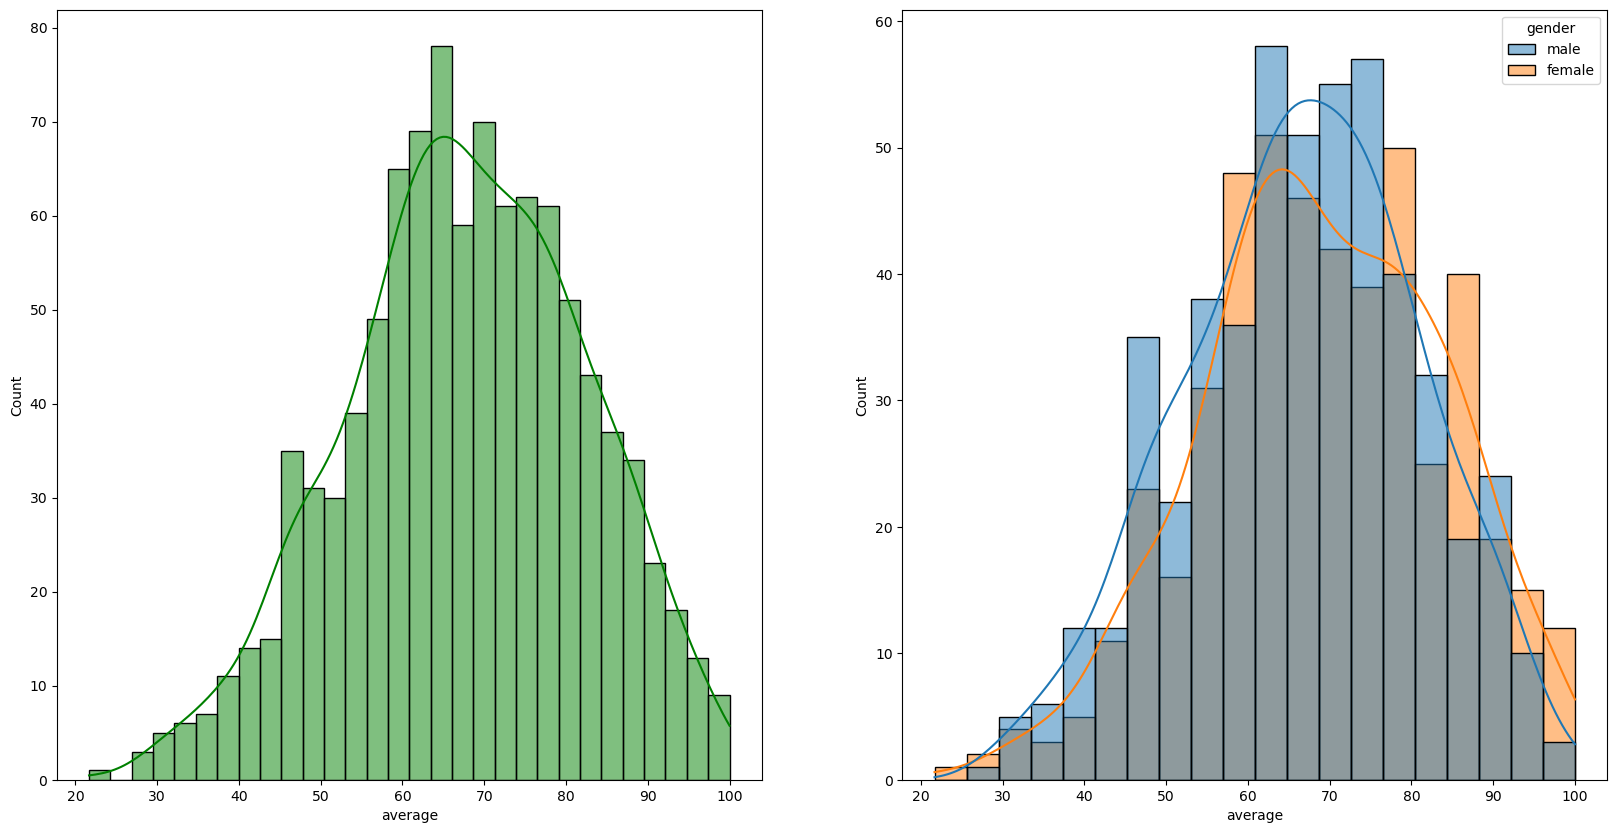

In [79]:
# Histogram and KDE. 

fig , ax = plt.subplots(1 ,2 , figsize = (20,10))
plt.subplot(121)
sns.histplot(data = data_import , x = 'average' , bins = 30 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = data_import , x = 'average' , kde = True , hue = 'gender')
plt.show()

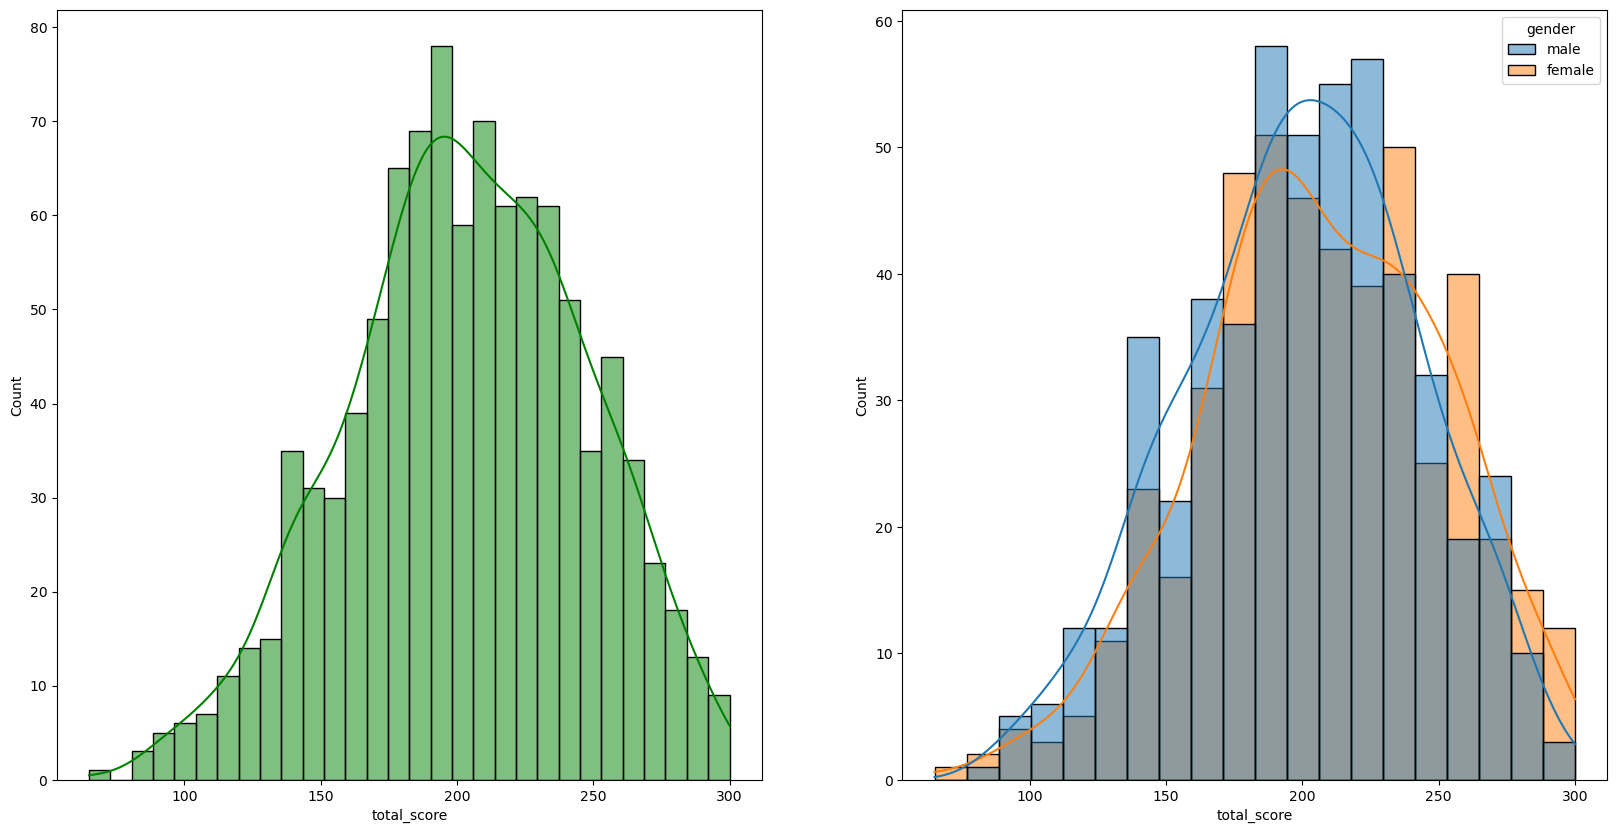

In [81]:
fig , ax = plt.subplots(1 ,2 , figsize = (20,10))
plt.subplot(121)
sns.histplot(data = data_import , x = 'total_score' , bins = 30 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = data_import , x = 'total_score' , kde = True , hue = 'gender')
plt.show()

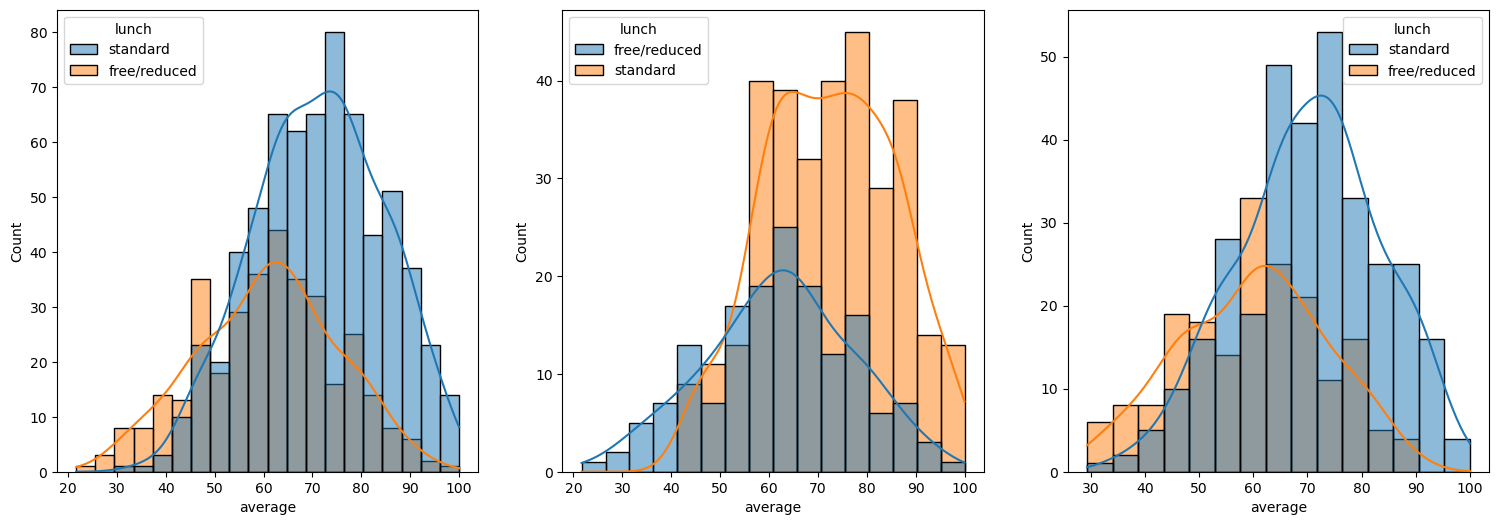

In [83]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data_import,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data_import[data_import.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data_import[data_import.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Observation 

<i>
    1. Standard lunch helps perform well in exam. <br>
    2. Standard lunch performs well in exam be it male or female.
</i>

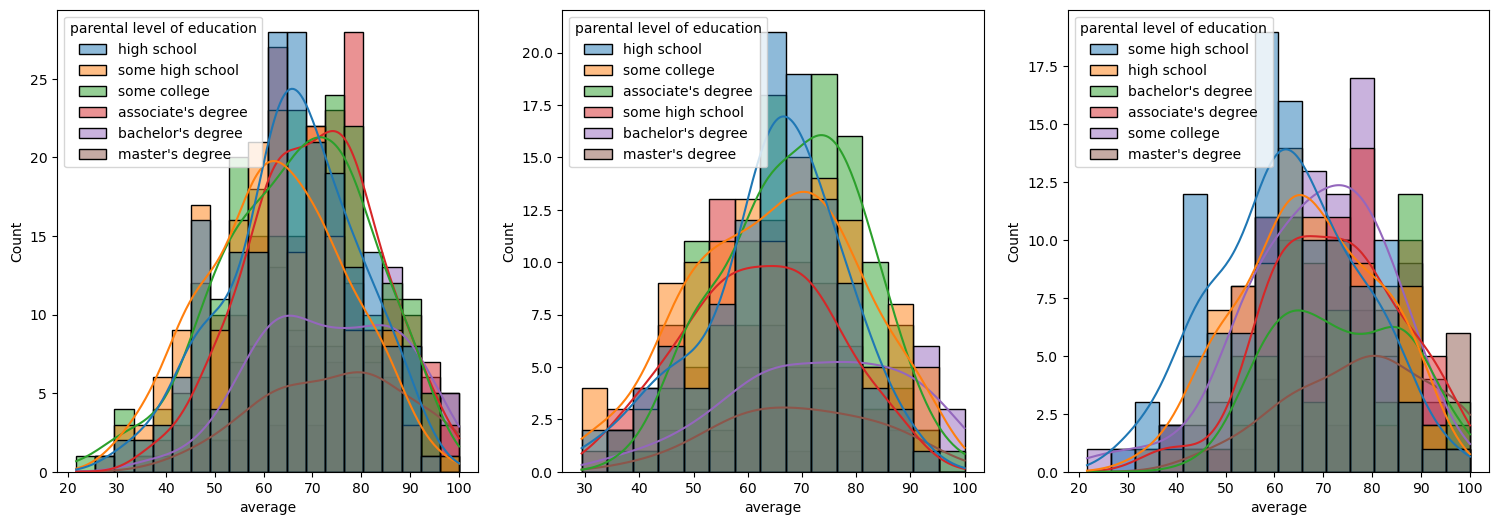

In [84]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data_import,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=data_import[data_import.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=data_import[data_import.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

##### Observation 


<i>
    1. In general for most of the students education level of parent's is high school and associate degree. <br>
    2. But for most male student's it's high school and for female it's some high school. <br>
</i>

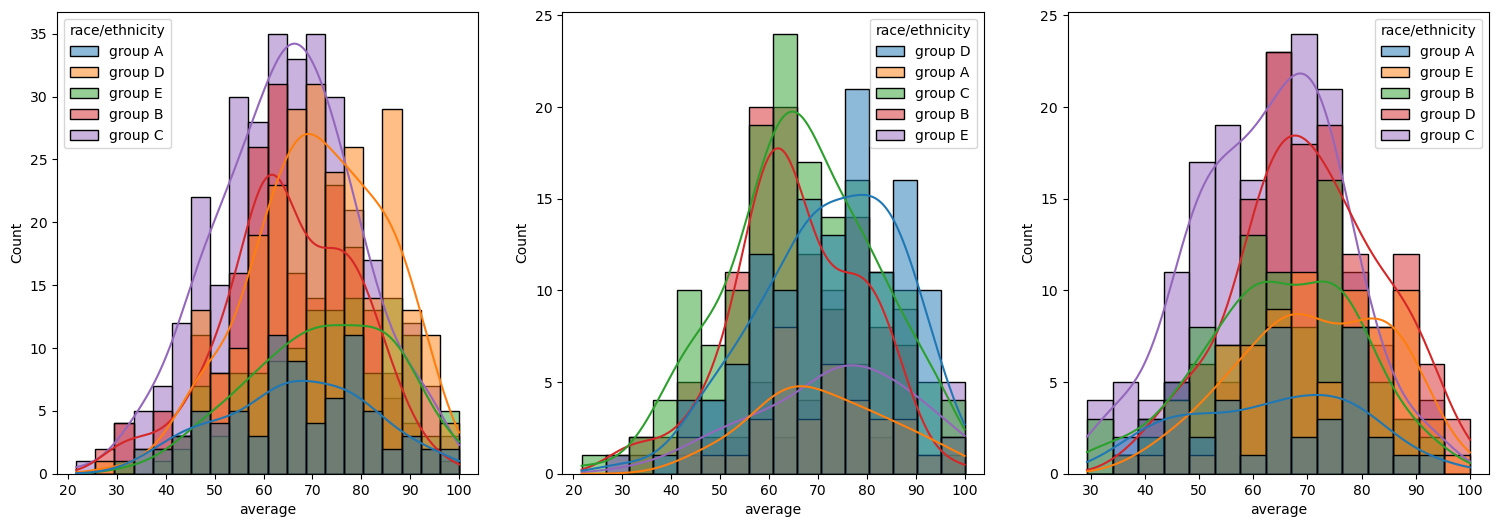

In [85]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data_import,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data_import[data_import.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data_import[data_import.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##### Observation

<i>
    1.Students of group A and group B tends to perform poorly in exam.<br>
    2.Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female 

</i>

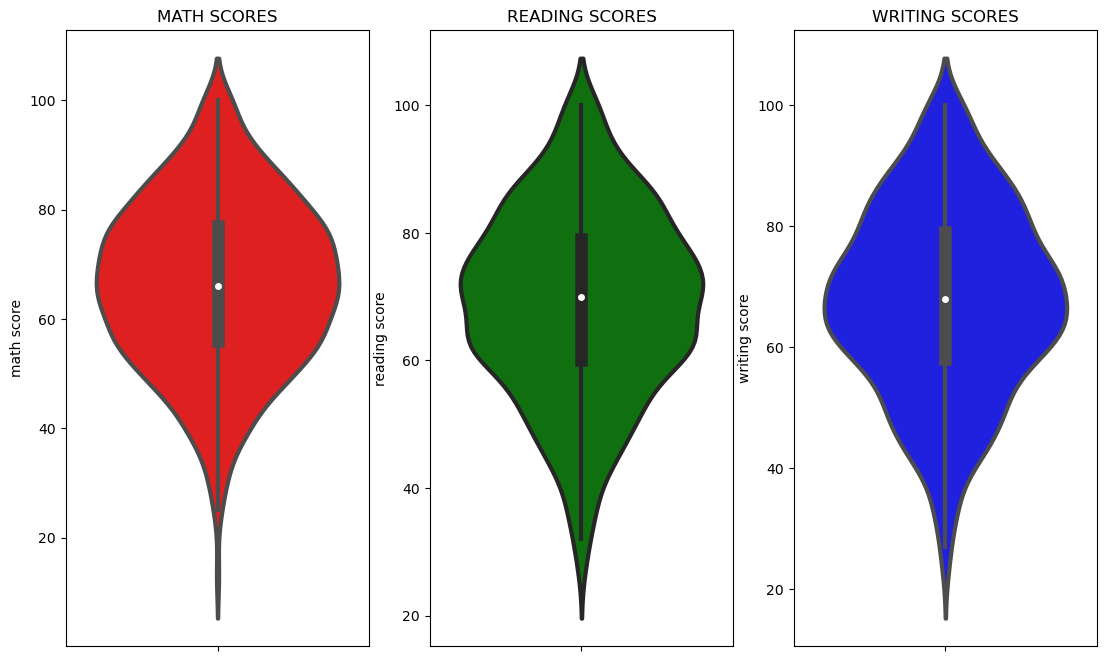

In [87]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data_import,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data_import,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data_import,color='blue',linewidth=3)
plt.show()

##### Observation 

<i>
    1. From the above plots , 
    its clearly visible that most of the students score in between 50 to 80. <br>
</i>

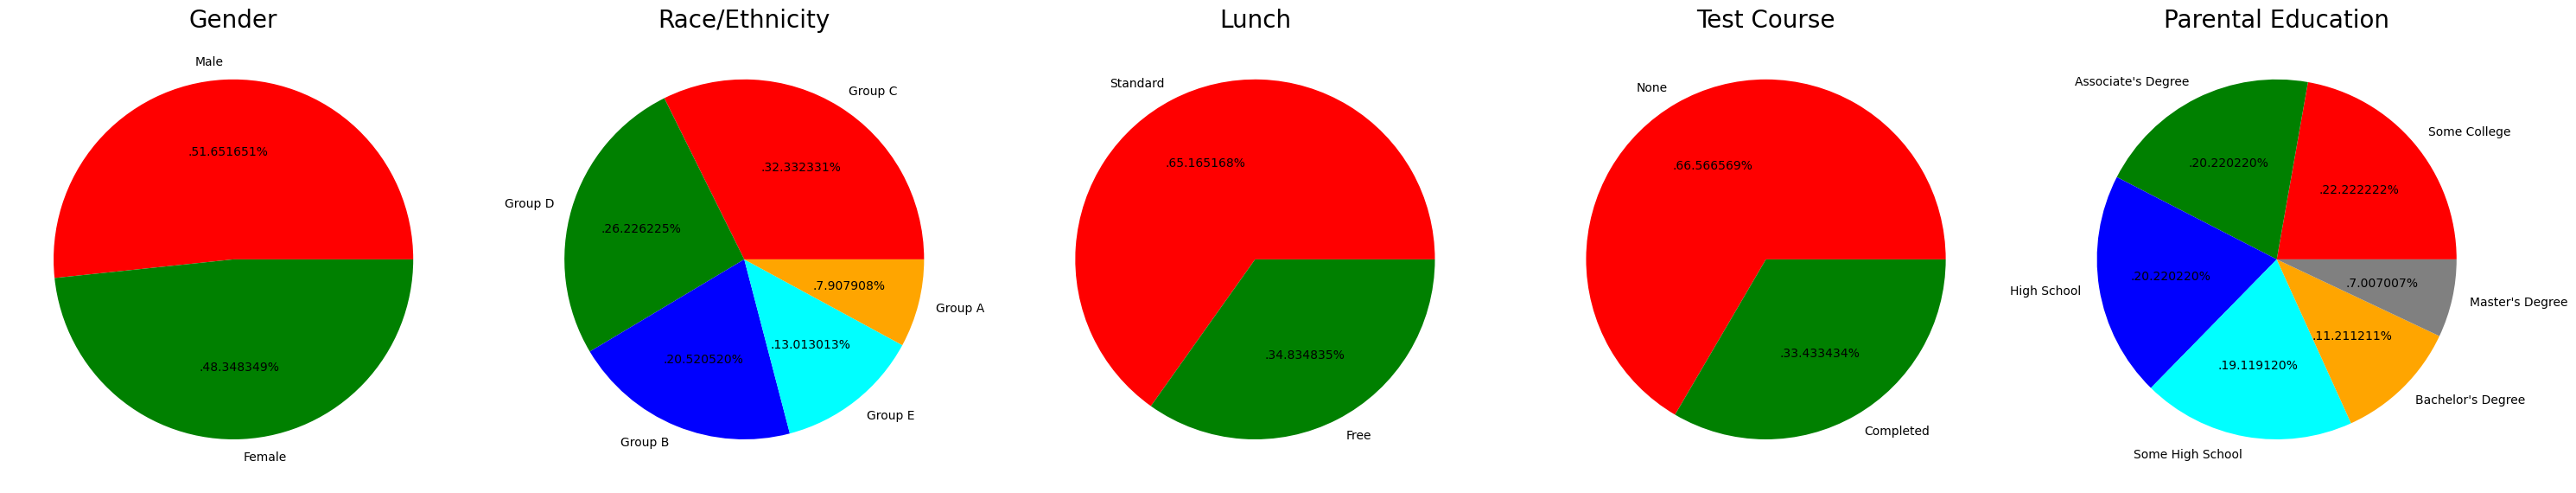

In [92]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data_import['gender'].value_counts()
labels = 'Male', 'Female'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data_import['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data_import['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data_import['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data_import['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Observation 

<i>
    1.Number of males students are more than female students. <br>
    2.Number if students are greatest in Group C <br>
    3.Number of students who have standard lunch are greater <br>
    Number of students who have not enrolled in any test preparation course is greater <br>
    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree" <br>
</i>

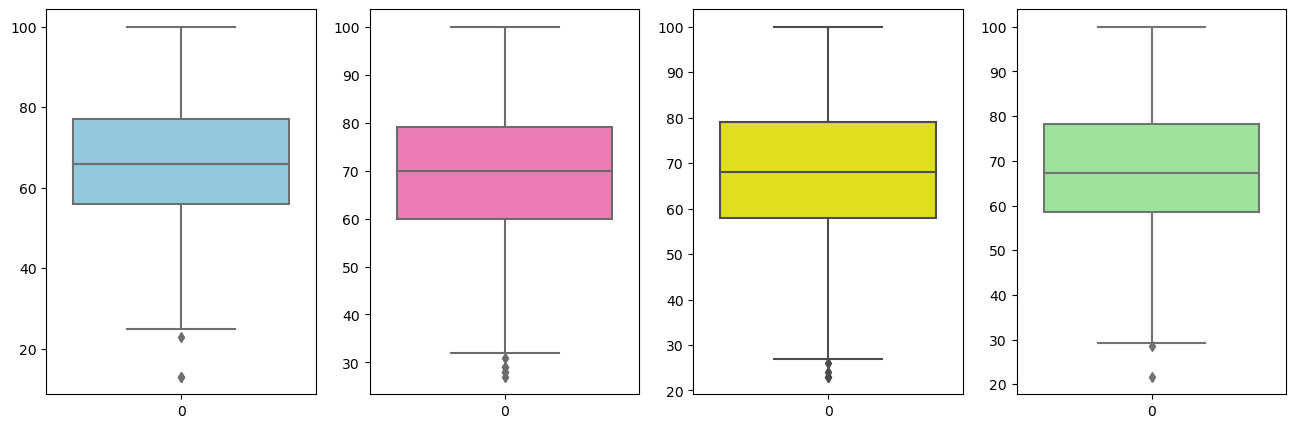

In [93]:
# Checking outliers ? 

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data_import['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data_import['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data_import['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data_import['average'],color='lightgreen')
plt.show()

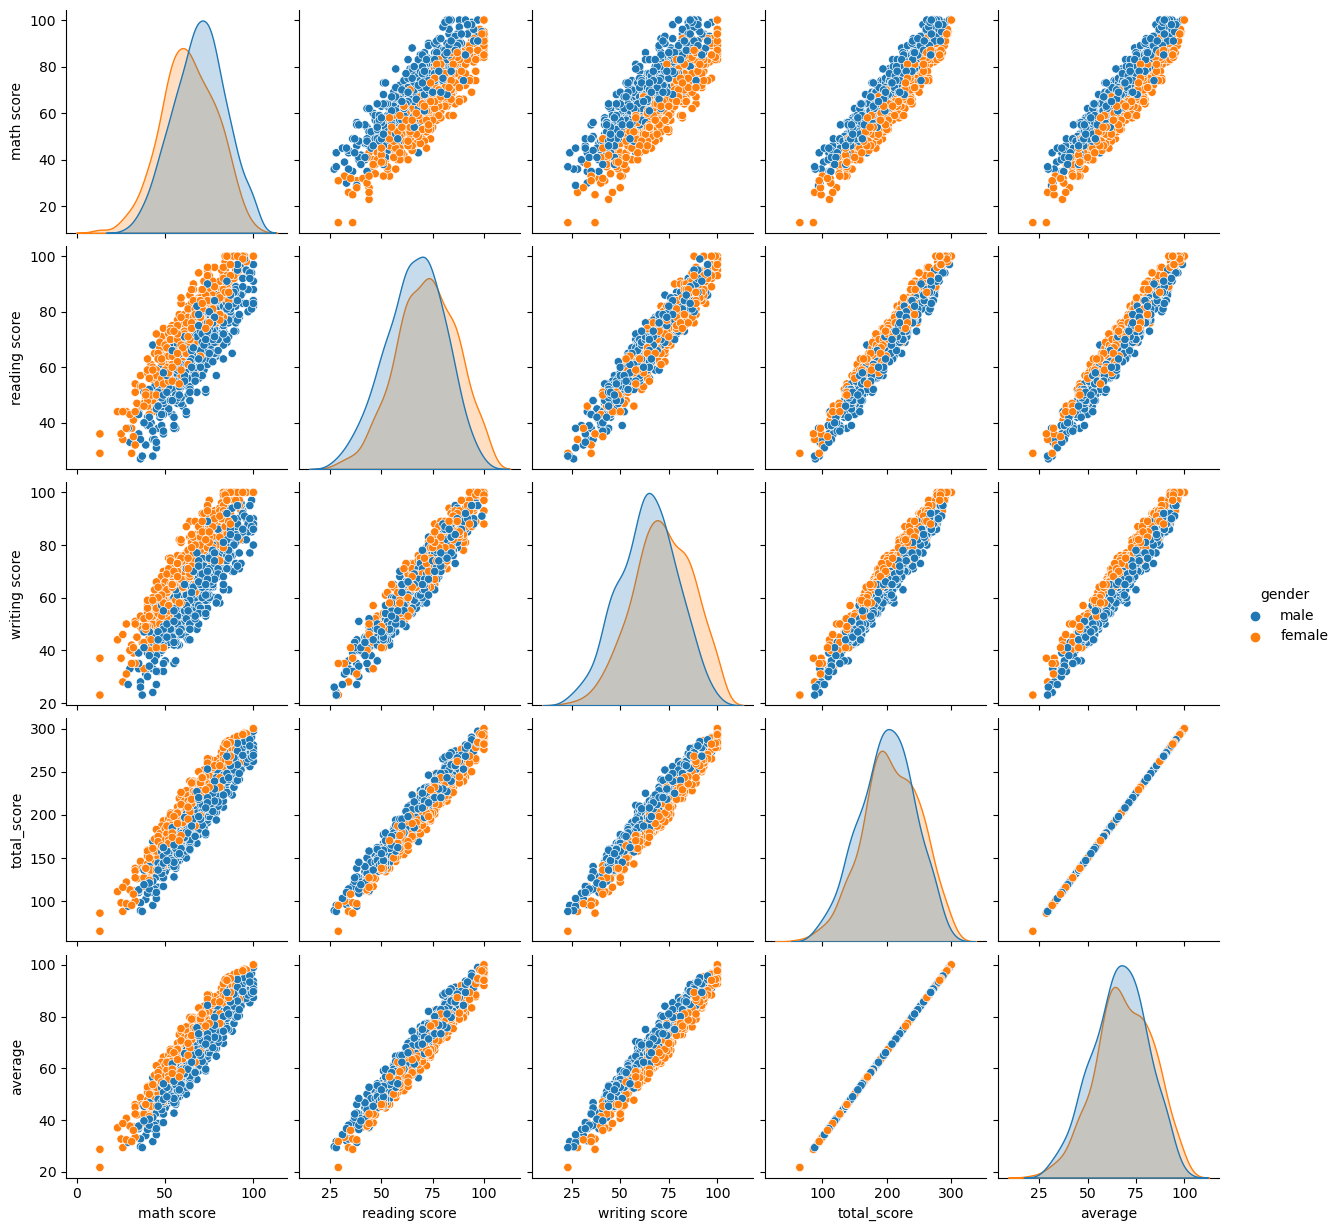

In [94]:
sns.pairplot(data_import,hue = 'gender')
plt.show()

##### Observation 

<i> From the above plot, it is clear that all the scores increases linearly with each other </i>

##### Write final conclusion. 